<a href="https://colab.research.google.com/github/IsacMonteiro/nlp/blob/main/scraping_music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. IMPORTANDO AS BIBLIOTECAS**

---

In [1]:
# Importando as bibliotecas

import requests
from bs4 import BeautifulSoup
import pandas as pd

# **2. DATASET MÚSICAS**

---

In [2]:
# Importando do site vagalume as músicas do artista Tim Maia

page = requests.get("https://www.vagalume.com.br/tim-maia/")
soup = BeautifulSoup(page.content, 'html.parser')
lista_alfabetica = BeautifulSoup(str(soup.findChildren(id = "alfabetMusicList")), 'html.parser')
a_tag = lista_alfabetica.findAll('a')

musicas = []
for a in a_tag:
    nome_musica = a.text
    if not(nome_musica == 'TRADUÇÃO' or nome_musica == ''):
        link_musica = a['href']
        musicas.append([nome_musica, link_musica])

for i in range(len(musicas)):
    link = "https://www.vagalume.com.br" + str(musicas[i][1])
    page = requests.get(link)
    soup = BeautifulSoup(page.content, 'html.parser')
    h3_tag = soup.findAll('h3')
    if len(h3_tag) != 0:
        album = h3_tag[0].text
    else:
        album = ''
    lyrics = soup.findChildren(id = 'lyrics')
    lyrics = str(lyrics[0])
    lyrics = lyrics.replace('<div id="lyrics">', '')
    lyrics = lyrics.replace('<div data-plugin="googleTranslate" id="lyrics">', '')
    lyrics = lyrics.replace('<br/>', ' ')
    lyrics = lyrics.replace("\'","'")
    lyrics = lyrics.replace('</div>', '')
    musicas[i].append(album)
    musicas[i].append(lyrics)

musicas = pd.DataFrame(musicas, columns=['Nome da Música', 'link', 'album', 'letra'])
musicas.to_csv('musicas.csv', index=False)

In [73]:
# Lendo o arquivo CSV 'musicas.csv'
musicas = pd.read_csv('musicas.csv')

# Exibindo as primeiras 20 linhas do DataFrame #https://www.vagalume.com.br/tim-maia/amores.html
musicas.head(20)


,Nome da Música,link,album,letra
0,A Bela E A Fera,/tim-maia/a-bela-e-a-fera.html,NaN,"Ouve a declaração, ó bela De um sonhador titã ..."
1,A Festa,/tim-maia/a-festa.html,Nuvens,Beleza... Maravilha! Essa festa está maneira ...
2,A Festa de Santo Reis,/tim-maia/a-festa-de-santo-reis.html,Soul Tim - Duetos,Hoje é o dia do Santo Reis Anda meio esquecid...
3,A Fim de Voltar,/tim-maia/a-fim-de-voltar.html,Warner 25 Anos: Tim Maia,A fim de voltar Coro: Mas eu tenho um certo re...
4,A Grande Família Brasileira,/tim-maia/a-grande-familia-brasileira.html,Tim Maia,Nem que chova canivete Esse safo vai sair sába...
5,A Paz Do Meu Mundo É Você,/tim-maia/a-paz-do-meu-mundo-e-voce.html,Tim Maia,"Paz na terra, é sonho que não morre. Vem meu a..."
6,A Rã,/tim-maia/a-ra.html,Tim Maia: ao Vivo,Coro de cor Sombra de som de cor De mal-me-que...
7,Acenda O Farol,/tim-maia/acenda-o-farol.html,Soul Tim - Duetos,Pneu furou Acenda o farol (2x) Se alguém ligou...
8,Acredito,/tim-maia/acredito.html,Tim Maia,"Acredito no suor, ir à luta a todo vapor Acred..."
9,Além do Horizonte,/tim-maia/alem-do-horizonte.html,NaN,Além do horizonte deve ter Algum lugar bonito ...


In [4]:
# Obtendo e concatenando o número de linhas com a string corretamente
print('Número de linhas: ' + str(musicas.shape[0]))

Número de linhas: 266


# **3. TRATANDO A BASE DE DADOS**

---



In [5]:
# Definindo o padrão de código para músicas instrumentais (convertido para minúsculas)
instrumental_code = 'instrumental<img alt="instrumental" class="instrumental-icon" src="/img/etc/instrumental.png"/>'


# Filtrando e removendo as linhas onde a coluna "letra" contenha o código de instrumental, ignorando maiúsculas e minúsculas
musicas_filtradas = musicas[~musicas['letra'].str.lower().str.contains(instrumental_code)]


# Salvando o DataFrame limpo em um novo arquivo CSV
musicas_filtradas.to_csv('musicas_filtradas.csv', index=False)


In [6]:
musicas_filtradas.head(20)

,Nome da Música,link,album,letra
0,A Bela E A Fera,/tim-maia/a-bela-e-a-fera.html,NaN,"Ouve a declaração, ó bela De um sonhador titã ..."
1,A Festa,/tim-maia/a-festa.html,Nuvens,Beleza... Maravilha! Essa festa está maneira ...
2,A Festa de Santo Reis,/tim-maia/a-festa-de-santo-reis.html,Soul Tim - Duetos,Hoje é o dia do Santo Reis Anda meio esquecid...
3,A Fim de Voltar,/tim-maia/a-fim-de-voltar.html,Warner 25 Anos: Tim Maia,A fim de voltar Coro: Mas eu tenho um certo re...
4,A Grande Família Brasileira,/tim-maia/a-grande-familia-brasileira.html,Tim Maia,Nem que chova canivete Esse safo vai sair sába...
5,A Paz Do Meu Mundo É Você,/tim-maia/a-paz-do-meu-mundo-e-voce.html,Tim Maia,"Paz na terra, é sonho que não morre. Vem meu a..."
6,A Rã,/tim-maia/a-ra.html,Tim Maia: ao Vivo,Coro de cor Sombra de som de cor De mal-me-que...
7,Acenda O Farol,/tim-maia/acenda-o-farol.html,Soul Tim - Duetos,Pneu furou Acenda o farol (2x) Se alguém ligou...
8,Acredito,/tim-maia/acredito.html,Tim Maia,"Acredito no suor, ir à luta a todo vapor Acred..."
9,Além do Horizonte,/tim-maia/alem-do-horizonte.html,NaN,Além do horizonte deve ter Algum lugar bonito ...


In [7]:
# Obtendo e concatenando o número de linhas com a string corretamente
print('Número de linhas: ' + str(musicas_filtradas.shape[0]))

Número de linhas: 262


# **4. PROCESSAMENTO DE LINGUAGEM NATURAL**

---



Importando as bibliotecas

In [8]:
# Instala a biblioteca Enelvo, que é utilizada para processar e analisar textos em português
!pip install enelvo

# Download do modelo em português - Spacy
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 52.2 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234910 sha256=a1344c80393fed74395d2bf4ca63475584d7492e7aa383299e4d06f9e2d4bed3
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 56.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
# Importa a biblioteca spaCy, que é usada para processamento avançado de linguagem natural.
import spacy

# Importa a biblioteca NLTK (Natural Language Toolkit), que oferece ferramentas para o processamento de linguagem natural.
import nltk

# Importa a biblioteca string, que contém constantes úteis para manipulação de strings.
import string

# Importa a função word_tokenize do NLTK para realizar a tokenização de texto, ou seja, dividir texto em palavras.
from nltk.tokenize import word_tokenize

# Importa a classe Normaliser da biblioteca Enelvo, que é usada para normalizar textos em português.
from enelvo.normaliser import Normaliser

# Importa a biblioteca pandas, que é usada para manipulação e análise de dados.
import pandas as pd


In [10]:
# Download dos complementos do NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Função para o tratamento e limpeza

In [11]:
from nltk.corpus import stopwords

nlp_spc = spacy.load('pt_core_news_sm')

# Limpando e tratando o texto
def limpar_texto(texto):
  # Normaliza as palavras
  normalizar = Normaliser(tokenizer='readable')
  texto_normal = normalizar.normalise(texto)

  # Separa as palavras - Tokenização
  tokens = word_tokenize(texto_normal)

  # Removendo a pontuação
  tokens_sem_pontuacao = [p for p in tokens if p not in string.punctuation]

  # Remove stopwords e converte as palavras em minúsculo
  stops = stopwords.words('portuguese')
  tokens_sem_stopwords = [p.lower() for p in tokens_sem_pontuacao if p.lower() not in stops]

  # Agrupando as palavras
  conjunto_token = " ".join(tokens_sem_stopwords)

  # Lemmatização - Extrai a palavra sem variação de gênero, tempo e número
  obj = nlp_spc(conjunto_token)
  tokens_lemma = [palavra.lemma_ for palavra in obj]

  return tokens_lemma

In [12]:
musicas_processadas = [limpar_texto(letra) for letra in musicas_filtradas["letra"]]

ERROR:enelvo.normaliser:Failed to normalise word "uuuhuuu"!
ERROR:enelvo.normaliser:Failed to normalise word "disenchantment"!
ERROR:enelvo.normaliser:Failed to normalise word "disenchantment"!
ERROR:enelvo.normaliser:Failed to normalise word "disenchantment"!
ERROR:enelvo.normaliser:Failed to normalise word "disenchantment"!
ERROR:enelvo.normaliser:Failed to normalise word "disenchantment"!


In [13]:
import string

# Agrupa todas as letras de músicas
tokens_agrupados = []
for musicas_filtradas in musicas_processadas:
    tokens_agrupados += musicas_filtradas

# Ordena os tokens agrupados em ordem alfabética
tokens_agrupados_ordenados = sorted(tokens_agrupados, key=str.lower)

# Define caracteres a serem removidos (aspas, vírgulas, acentos e pontuação)
caracteres_para_remover = "'\"´“”‘’" + string.punctuation  # Inclui pontuação geral

# Cria uma tabela de tradução para remover os caracteres indesejados
trans_table = str.maketrans('', '', caracteres_para_remover)

# Remove caracteres indesejados de cada token
tokens_agrupados_sem_caracteres = [token.translate(trans_table).strip() for token in tokens_agrupados_ordenados]

# Filtra tokens vazios
tokens_agrupados_sem_caracteres = [token for token in tokens_agrupados_sem_caracteres if token]

# Verificando os tokens agrupados em ordem alfabética, sem os caracteres indesejados
for token in tokens_agrupados_sem_caracteres:
    print(token)


A saída de streaming foi truncada nas últimas 5000 linhas.
rar
raro
rastro
rational
rational
rational
rational
rational
razão
razão
razão
razão
razão
razão
razão
razão
razão
razão
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
re
reabrir
reabrir
read
read
read
read
real
real
real
Real
Real
real
real
real
realengo
realidade
reality
realizar
realizar
realizar
realizar
realizar
realizar
realmente
realmente
reason
rebolar
rebolar
receber
receber
receber
receio
receio
receio
receio
receio
receio
receio
recepção
recife
recife
recomeçar
recomeçar
recomeçar
recomeçar
recordar
recordar
recordar
recordar
recordar
recordar
recriar
recuperar
recuperar
recuperar
recuperar
recuperar
red
redor
redor
reencontrei
refazer
refazer
refletir
refletor
refr
refr
refr
refr
refr
refr
refr
refr
refr
refr
refr
refr
refr
refr
refr
refrão
refrão
refuser
refuser
refuser
refzer
regalamos
regalar
regalar
regra
regret
regulagem
rei
rei
rei
rei
re

Análise gráfica e Nuvem de palavras

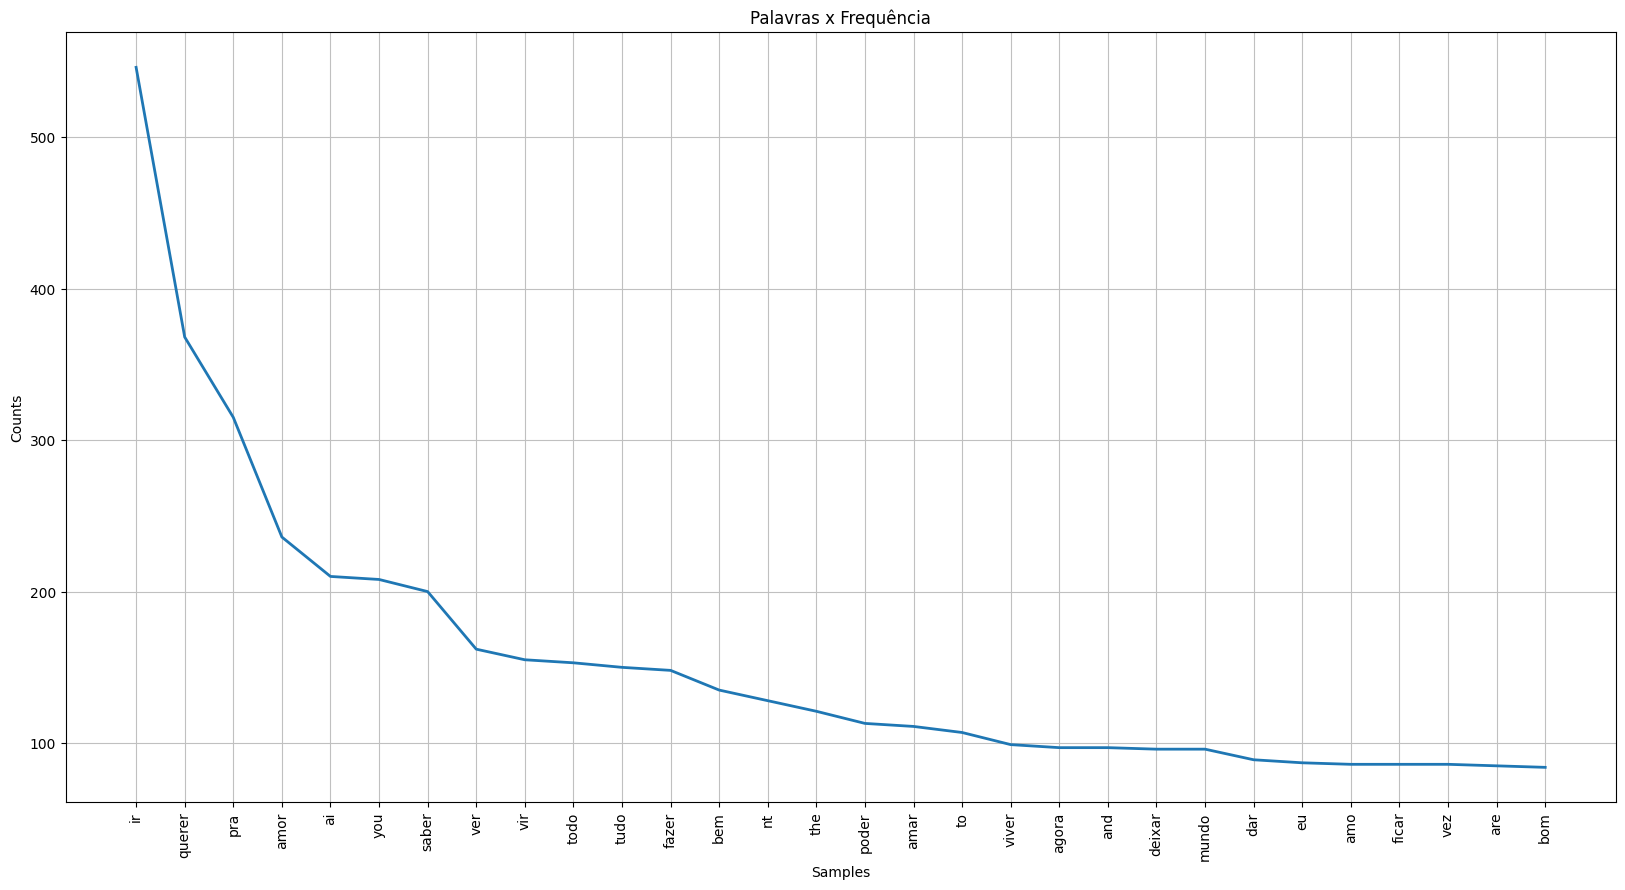

<Axes: title={'center': 'Palavras x Frequência'}, xlabel='Samples', ylabel='Counts'>

In [14]:
# Gerando um gráfico de frequência de palavras
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
fd = nltk.FreqDist(tokens_agrupados_sem_caracteres)
fd.plot(30, title='Palavras x Frequência', cumulative=False)

In [27]:
frequencias = pd.DataFrame(fd.items(), columns=['Palavra', 'Frequência'])
frequencias = frequencias.sort_values(by='Frequência', ascending=False)

# Exibindo a tabela sem a coluna de índice
frequencias.head(20).style.hide()

Palavra,Frequência
ir,546
querer,368
pra,315
amor,236
ai,210
you,208
saber,200
ver,162
vir,155
todo,153


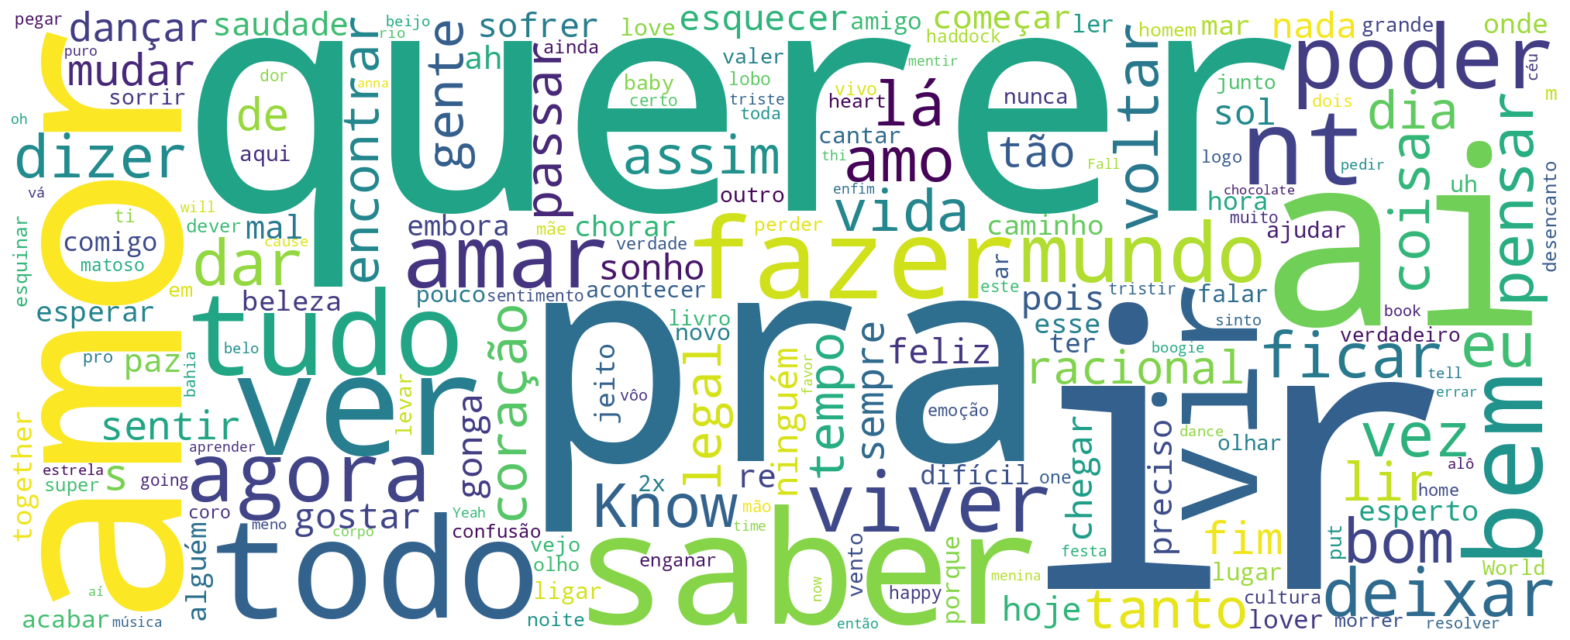

In [16]:
# Nuvem de palavras
from wordcloud import wordcloud

texto = " ".join(tokens_agrupados_sem_caracteres)
wordcloud = wordcloud.WordCloud(background_color="white", width=2000, height=800, collocations=False).generate(texto)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig("Tim_Maia.png", dpi=fig.dpi)
plt.show()

# **5. ANÁLISE DE SENTIMENTO**

---





In [46]:
# Importa a classe SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer

In [47]:
# Inicializa o analisador de sentimento
sia = SentimentIntensityAnalyzer()

In [48]:
# Função para analisar o sentimento de cada letra
def analisar_sentimento(letra):
    return sia.polarity_scores(letra)

In [75]:
# Aplica a função de análise de sentimento a todas as letras
musicas['sentimento'] = musicas['letra'].apply(analisar_sentimento)

In [77]:
# Exibe as pontuações de sentimento para todas as músicas
musicas[['Nome da Música', 'sentimento']].head(20).style.hide(axis="index")

Nome da Música,sentimento
A Bela E A Fera,"{'neg': 0.054, 'neu': 0.946, 'pos': 0.0, 'compound': -0.6808}"
A Festa,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.9514}"
A Festa de Santo Reis,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
A Fim de Voltar,"{'neg': 0.0, 'neu': 0.992, 'pos': 0.008, 'compound': 0.25}"
A Grande Família Brasileira,"{'neg': 0.0, 'neu': 0.978, 'pos': 0.022, 'compound': 0.128}"
A Paz Do Meu Mundo É Você,"{'neg': 0.11, 'neu': 0.79, 'pos': 0.1, 'compound': 0.4215}"
A Rã,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
Acenda O Farol,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
Acredito,"{'neg': 0.084, 'neu': 0.878, 'pos': 0.038, 'compound': -0.4215}"
Além do Horizonte,"{'neg': 0.038, 'neu': 0.892, 'pos': 0.07, 'compound': 0.8126}"


In [51]:
# Cria um DataFrame para armazenar as pontuações agregadas
sentimentos_aggregados = pd.DataFrame(musicas['sentimento'].tolist())

In [52]:
# Calcula a média de cada tipo de sentimento
media_sentimentos = sentimentos_aggregados.mean()

In [54]:
# Cria um DataFrame a partir das médias calculadas
media_sentimentos_df = pd.DataFrame(media_sentimentos, columns=['Média'])

In [55]:
# Define as labels mais amigáveis para as colunas
media_sentimentos_df.index = ['Negativo', 'Neutro', 'Positivo', 'Composto']

In [67]:
# Exibe as médias
media_sentimentos_df.style.format("{:.4f}")

,Média
Negativo,0.0239
Neutro,0.9107
Positivo,0.0655
Composto,0.2903
